In [105]:
import pandas as pd
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
images = os.listdir('../image/')

In [3]:
df = pd.read_csv('data/cossim_result.csv')
df.head()

,파일명,cossim
0,C10100020002-L000000549595.png,0.30838029172372905
1,C10100030004-8809311140519.png,0.3774832204826477
2,C10100030004-8809285520850.png,-0.34374026732040036
3,C10100020003-L000000578099.png,0.26004839180984674
4,C10100020001-3032163105008.png,-0.5579422839012692


In [21]:
filenames = df['파일명'].tolist()
filenames[:10]

['C10100020002-L000000549595.png',
 'C10100030004-8809311140519.png',
 'C10100030004-8809285520850.png',
 'C10100020003-L000000578099.png',
 'C10100020001-3032163105008.png',
 'C10100030005-8809258925262.png',
 'C10100020002-L000002760554.png',
 'C10100030003-8809282303999.png',
 'C10100030005-4549660121978.png',
 'C10100030002-L000000467780.png']

In [11]:
CategoryIDs = [f.split('-')[0] for f in filenames]
CategoryIDs[:10]

['C10100020002',
 'C10100030004',
 'C10100030004',
 'C10100020003',
 'C10100020001',
 'C10100030005',
 'C10100020002',
 'C10100030003',
 'C10100030005',
 'C10100030002']

In [18]:
'C10100020002-L000000549595.png'.split('-')[1].split('.png')[0]

'L000000549595'

In [12]:
ProductIDs = [f.split('-')[1].split('.png')[0] for f in filenames]

IndexError: list index out of range

In [15]:
ProductIDs = []
for f in filenames:
    try:
        ProductIDs.append(f.split('-')[1])
    except:
        print(f)

.ipynb_checkpoints


In [17]:
filenames.pop(3113)

'.ipynb_checkpoints'

In [19]:
ProductIDs = [f.split('-')[1].split('.png')[0] for f in filenames]

In [20]:
df.loc[df['파일명'] == '.ipynb_checkpoints']

,파일명,cossim
3113,.ipynb_checkpoints,Error2


In [22]:
ProductIDs = []
for f in filenames:
    try:
        ProductIDs.append(f.split('-')[1].split('.png')[0])
    except:
        ProductIDs.append(f)

In [23]:
len(ProductIDs), len(CategoryIDs)

(4340, 4340)

In [24]:
df['ProductID'] = ProductIDs

In [25]:
df['CategoryID'] = CategoryIDs

In [26]:
df.head()

,파일명,cossim,ProductID,CategoryID
0,C10100020002-L000000549595.png,0.30838029172372905,L000000549595,C10100020002
1,C10100030004-8809311140519.png,0.3774832204826477,8809311140519,C10100030004
2,C10100030004-8809285520850.png,-0.34374026732040036,8809285520850,C10100030004
3,C10100020003-L000000578099.png,0.26004839180984674,L000000578099,C10100020003
4,C10100020001-3032163105008.png,-0.5579422839012692,3032163105008,C10100020001


In [27]:
girls = pd.read_csv('../data/colors_of_toys_category_girl.csv')
boys = pd.read_csv('../data/colors_of_toys_category_boy.csv')

In [28]:
girls

,성별구분,카테고리명,카테고리ID,총 개수
0,여아,역할놀이,C10100020001,436
1,여아,인형,C10100020002,2105
2,여아,꾸미기,C10100020003,394
3,여아,DIY/취미,C10100020004,466


In [29]:
boys

,성별구분,카테고리명,카테고리ID,총 개수
0,남아,역할놀이,C10100030001,279
1,남아,액션,C10100030002,707
2,남아,조종,C10100030003,227
3,남아,자동차/기차,C10100030004,767
4,남아,프라모델/피규어,C10100030005,553


In [30]:
df.to_csv('data/cossim_result_with_IDs.csv', index=False)

In [59]:
df['카테고리명'] = df['CategoryID'].astype("category")
df['카테고리명']

0       C10100020002
1       C10100030004
2       C10100030004
3       C10100020003
4       C10100020001
5       C10100030005
6       C10100020002
7       C10100030003
8       C10100030005
9       C10100030002
10      C10100020001
11      C10100030005
12      C10100020002
13      C10100020004
14      C10100020002
15      C10100020001
16      C10100030001
17      C10100020001
18      C10100030004
19      C10100020002
20      C10100020004
21      C10100020001
22      C10100020002
23      C10100020002
24      C10100020002
25      C10100030001
26      C10100030005
27      C10100020004
28      C10100020004
29      C10100020001
            ...     
4310    C10100020002
4311    C10100020002
4312    C10100030005
4313    C10100020002
4314    C10100030005
4315    C10100030002
4316    C10100020002
4317    C10100020002
4318    C10100030002
4319    C10100020001
4320    C10100030003
4321    C10100020002
4322    C10100020002
4323    C10100030001
4324    C10100020001
4325    C10100030004
4326    C1010

In [50]:
ls = df['카테고리명'].unique().tolist()
ls

['C10100020002',
 'C10100030004',
 'C10100020003',
 'C10100020001',
 'C10100030005',
 'C10100030003',
 'C10100030002',
 'C10100020004',
 'C10100030001',
 '.ipynb_checkpoints']

In [39]:
girls

,성별구분,카테고리명,카테고리ID,총 개수
0,여아,역할놀이,C10100020001,436
1,여아,인형,C10100020002,2105
2,여아,꾸미기,C10100020003,394
3,여아,DIY/취미,C10100020004,466


In [40]:
boys

,성별구분,카테고리명,카테고리ID,총 개수
0,남아,역할놀이,C10100030001,279
1,남아,액션,C10100030002,707
2,남아,조종,C10100030003,227
3,남아,자동차/기차,C10100030004,767
4,남아,프라모델/피규어,C10100030005,553


In [55]:
df['카테고리명'].cat.categories

Index(['.ipynb_checkpoints', 'C10100020001', 'C10100020002', 'C10100020003',
       'C10100020004', 'C10100030001', 'C10100030002', 'C10100030003',
       'C10100030004', 'C10100030005'],
      dtype='object')

In [124]:
names = '.ipynb_checkpoints,girl-RolePlay,girl-Doll,girl-Deco,girl-DIY,boy-RolePlay,boy-Action,boy-Control,boy-Car/Train,boy-Figure'.split(',')

In [125]:
names

['.ipynb_checkpoints',
 'girl-RolePlay',
 'girl-Doll',
 'girl-Deco',
 'girl-DIY',
 'boy-RolePlay',
 'boy-Action',
 'boy-Control',
 'boy-Car/Train',
 'boy-Figure']

In [126]:
df['카테고리명'].cat.categories = names

In [127]:
df.head()

,파일명,cossim,ProductID,CategoryID,카테고리명,성구분
0,C10100020002-L000000549595.png,0.30838029172372905,L000000549595,C10100020002,girl-Doll,여아
1,C10100030004-8809311140519.png,0.3774832204826477,8809311140519,C10100030004,boy-Car/Train,남아
2,C10100030004-8809285520850.png,-0.34374026732040036,8809285520850,C10100030004,boy-Car/Train,남아
3,C10100020003-L000000578099.png,0.26004839180984674,L000000578099,C10100020003,girl-Deco,여아
4,C10100020001-3032163105008.png,-0.5579422839012692,3032163105008,C10100020001,girl-RolePlay,여아


In [128]:
df['성구분'] = [n.split('-')[0] for n in df['카테고리명'].tolist()]
df.head()

,파일명,cossim,ProductID,CategoryID,카테고리명,성구분
0,C10100020002-L000000549595.png,0.30838029172372905,L000000549595,C10100020002,girl-Doll,girl
1,C10100030004-8809311140519.png,0.3774832204826477,8809311140519,C10100030004,boy-Car/Train,boy
2,C10100030004-8809285520850.png,-0.34374026732040036,8809285520850,C10100030004,boy-Car/Train,boy
3,C10100020003-L000000578099.png,0.26004839180984674,L000000578099,C10100020003,girl-Deco,girl
4,C10100020001-3032163105008.png,-0.5579422839012692,3032163105008,C10100020001,girl-RolePlay,girl


In [129]:
df.to_csv('data/cossim_result_with_IDs_eng.csv', index=False)

In [130]:
df2 = df[df.cossim != 'Error']
df2 = df2[df2.cossim != 'Error2']
df2

,파일명,cossim,ProductID,CategoryID,카테고리명,성구분
0,C10100020002-L000000549595.png,0.30838029172372905,L000000549595,C10100020002,girl-Doll,girl
1,C10100030004-8809311140519.png,0.3774832204826477,8809311140519,C10100030004,boy-Car/Train,boy
2,C10100030004-8809285520850.png,-0.34374026732040036,8809285520850,C10100030004,boy-Car/Train,boy
3,C10100020003-L000000578099.png,0.26004839180984674,L000000578099,C10100020003,girl-Deco,girl
4,C10100020001-3032163105008.png,-0.5579422839012692,3032163105008,C10100020001,girl-RolePlay,girl
5,C10100030005-8809258925262.png,0.22814667109435743,8809258925262,C10100030005,boy-Figure,boy
6,C10100020002-L000002760554.png,0.641644745426853,L000002760554,C10100020002,girl-Doll,girl
7,C10100030003-8809282303999.png,0.09389356202923496,8809282303999,C10100030003,boy-Control,boy
8,C10100030005-4549660121978.png,0.5246464303714282,4549660121978,C10100030005,boy-Figure,boy
9,C10100030002-L000000467780.png,0.5378601101271819,L000000467780,C10100030002,boy-Action,boy


In [131]:
df2['cossim'] = df2['cossim'].astype('float64')
df2['cossim'].max()

0.9856330825025118

In [132]:
df2['cossim'].describe()

count    4305.000000
mean        0.257864
std         0.296465
min        -0.987428
25%         0.071640
50%         0.278260
75%         0.462642
max         0.985633
Name: cossim, dtype: float64

In [134]:
df2[df2.성구분 == 'girl']['cossim'].describe()

count    2436.000000
mean        0.321193
std         0.297797
min        -0.987428
25%         0.155084
50%         0.343190
75%         0.521737
max         0.985633
Name: cossim, dtype: float64

In [135]:
df2[df2.성구분 == 'boy']['cossim'].describe()

count    1869.000000
mean        0.175323
std         0.273606
min        -0.714828
25%        -0.013385
50%         0.188229
75%         0.372250
max         0.840778
Name: cossim, dtype: float64

In [179]:
df_girls.head()

,파일명,cossim,ProductID,CategoryID,카테고리명,성구분
0,C10100020002-L000000549595.png,0.308380,L000000549595,C10100020002,girl-Doll,girl
3,C10100020003-L000000578099.png,0.260048,L000000578099,C10100020003,girl-Deco,girl
4,C10100020001-3032163105008.png,-0.557942,3032163105008,C10100020001,girl-RolePlay,girl
6,C10100020002-L000002760554.png,0.641645,L000002760554,C10100020002,girl-Doll,girl
10,C10100020001-8809182326807.png,0.402173,8809182326807,C10100020001,girl-RolePlay,girl


In [189]:
for name in names:
    if name == '.ipynb_checkpoints':
        continue
    d = df2[df2['카테고리명'] == name]['cossim'].describe()
    print(f'\n카테고리명 : {name}\n평균 : {d[1]}\n분산 : {d[2]}\n최소 : {d[3]}\n최대 : {d[-1]}\n')
    print('-' * 20)


카테고리명 : girl-RolePlay
평균 : 0.3336542544324178
분산 : 0.26672937494714855
최소 : -0.56370700526881
최대 : 0.8549061596552157

--------------------

카테고리명 : girl-Doll
평균 : 0.316429871269877
분산 : 0.29916052199161053
최소 : -0.852873336423393
최대 : 0.9856330825025118

--------------------

카테고리명 : girl-Deco
평균 : 0.4149441264122056
분산 : 0.31452918837075583
최소 : -0.7866059799406425
최대 : 0.9444158313609993

--------------------

카테고리명 : girl-DIY
평균 : 0.2463598849271239
분산 : 0.283002976635975
최소 : -0.9874275616582838
최대 : 0.9617439850226983

--------------------

카테고리명 : boy-RolePlay
평균 : 0.11770270200115326
분산 : 0.24168256926599618
최소 : -0.5593221988340066
최대 : 0.7396583659622211

--------------------

카테고리명 : boy-Action
평균 : 0.1827613424520017
분산 : 0.2708855999942331
최소 : -0.6793156581747347
최대 : 0.8034961480318831

--------------------

카테고리명 : boy-Control
평균 : 0.21924060815584473
분산 : 0.2924472285470771
최소 : -0.6815075350298601
최대 : 0.8407779069854971

--------------------

카테고리명 : boy-Car/Train
평

In [185]:
df_girls[df.카테고리명 == 'girl-Doll']['cossim'].describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    1453.000000
mean        0.316430
std         0.299161
min        -0.852873
25%         0.163607
50%         0.338394
75%         0.514735
max         0.985633
Name: cossim, dtype: float64

In [187]:
df_girls[df.카테고리명 == 'girl-Doll']['cossim'].describe()[-1]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.9856330825025118

In [161]:
sns.set(style="ticks", color_codes=True, rc={'figure.figsize':(40,30)})

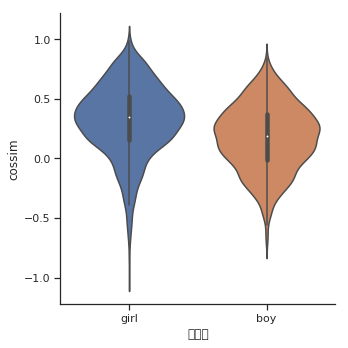

In [162]:
# 파란색이 여아, 주황색이 남아
sns.catplot(x="성구분", y="cossim", data=df2, kind='violin')

In [138]:
df_girls = df2[df2.성구분 == 'girl']

In [146]:
df_girls['카테고리명'].unique()

[girl-Doll, girl-Deco, girl-RolePlay, girl-DIY]
Categories (4, object): [girl-Doll, girl-Deco, girl-RolePlay, girl-DIY]

In [148]:
g_categ = ['girl-RolePlay', 'girl-Doll', 'girl-Deco', 'girl-DIY']

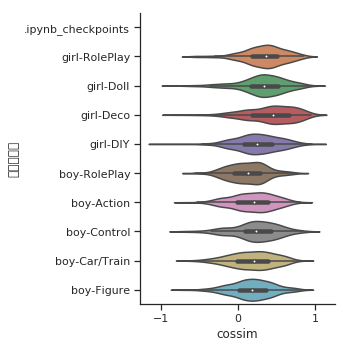

In [172]:
sns.catplot(x='cossim', y="카테고리명", data=df2, kind='violin')

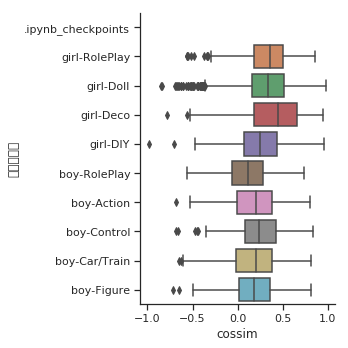

In [173]:
sns.catplot(x='cossim', y="카테고리명", data=df2, kind='box')

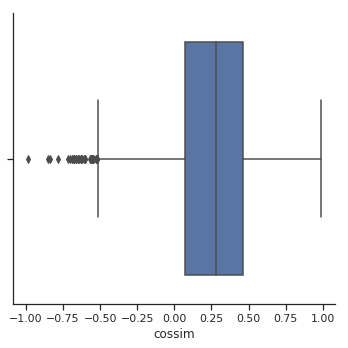

In [190]:
sns.catplot(x='cossim', data=df2, kind='box')